In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error







# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys


# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')


sys.path.append(os.path.abspath("../src"))   
import soporte_regresion as f

In [ ]:
df_rf=pd.read_csv("..\datos2\datos_nulos_encoded.csv", index_col=0).reset_index(drop=True)
df_rf

,price,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,yearCreated,monthCreated,powerCV_robust,kilometer_robust,abtest_control,abtest_test
0,480,5159.856113,4564.535429,4727.559085,2494.627126,5002.971271,5323.888161,3235.898669,5916.421491,5854.684494,0.076874,0.0,0.0,1.0
1,18300,11832.189405,12217.768059,4727.559085,6113.082894,8581.841188,8967.008541,2226.078714,5916.421491,5854.684494,1.063492,-0.5,0.0,1.0
2,9800,13294.516105,4564.535429,10690.463180,6149.016849,8581.841188,11044.232529,3235.898669,5916.421491,5854.684494,0.650794,-0.5,0.0,1.0
3,1500,2796.719833,4564.535429,4727.559085,6269.662202,5002.971271,5323.888161,7091.882008,5916.421491,5854.684494,-0.730159,0.0,0.0,1.0
4,3600,2796.719833,4564.535429,4727.559085,6723.013979,8581.841188,6486.861500,7091.882008,5916.421491,5854.684494,-0.825397,-1.2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360396,2200,5159.856113,4564.535429,3454.425584,6389.266316,3292.942886,14404.924110,3235.898669,5916.421491,5854.684494,0.076874,-2.6,0.0,1.0
360397,1199,10735.558123,4564.535429,10690.463180,6205.631045,5002.971271,3582.753962,7091.882008,5916.421491,5854.684494,-0.317460,-0.5,0.0,1.0
360398,9200,6726.772859,4564.535429,4727.559085,6205.631045,8581.841188,5323.888161,7091.882008,5916.421491,5854.684494,-0.301587,0.0,0.0,1.0
360399,3400,5829.482345,4564.535429,4727.559085,6269.662202,8581.841188,5323.888161,3235.898669,5916.421491,5854.684494,-0.333333,0.0,0.0,1.0


In [3]:
x= df_rf.drop(columns="price")
y= df_rf[["price"]]

In [4]:
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)  

Voy a meter los parametros de mi mejor modelo (el de 2000 nodos)  

(max_depth=200,
 max_leaf_nodes=2000,
 min_samples_leaf=10,
min_samples_split=50)

In [58]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [80,100,120],    #número de árboles que queremos que haga
    'max_features': [4,8,10,13],
    'max_depth': [200],
    'min_samples_split': [50],
    'min_samples_leaf': [10], 
    'max_leaf_nodes': [2000]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["price"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=200, max_features=8, max_leaf_nodes=2000,
                      min_samples_leaf=10, min_samples_split=50,
                      n_estimators=120, random_state=42)

In [59]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [60]:
pd.options.display.float_format = "{:,.2f}".format   #para la notación

In [85]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.73,"1,840.16","23,222,962.06","4,819.02"
test,0.71,"1,908.49","23,398,868.07","4,837.24"


Aunque RMSE no muestra over fitting el r2 si que lo muestra por ello,

In [62]:
df_importancia=pd.DataFrame(modelo_final_rf.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia

,Importancia
powerCV_robust,0.43
kilometer_robust,0.24
brand,0.13
yearOfRegistration,0.09
vehicleType,0.04
fuelType,0.03
notRepairedDamage,0.01
gearbox,0.01
monthOfRegistration,0.01
monthCreated,0.00


<Axes: xlabel='Importancia', ylabel='None'>

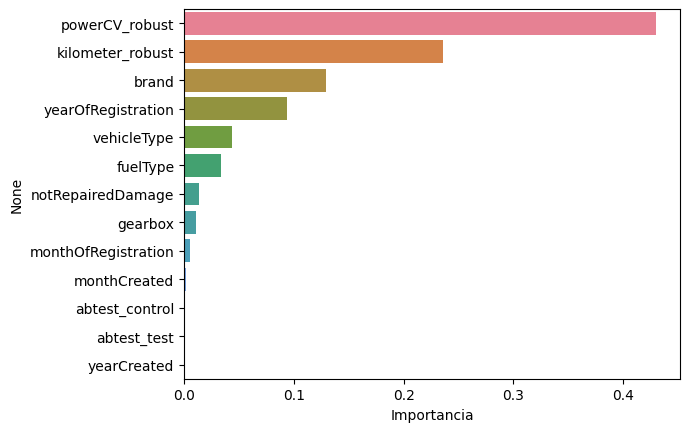

In [63]:
sns.barplot(x="Importancia", y= df_importancia.index, hue=df_importancia.index, data= df_importancia)

No dropeo esas columnas porque me genera mucho Over fitting hacerlo

In [64]:
# x_train_reducida=x_train.drop(columns=["monthCreated","abtest_control","abtest_test","yearCreated"])
# x_test_reducida=x_test.drop(columns=["monthCreated","abtest_control","abtest_test","yearCreated"])


### *GRADIENT BOOSTING*

In [65]:
# modelo_gb= GradientBoostingRegressor(random_state=42)

# params_gb={    
#     'n_estimators': [90,100,110],    #número de árboles que queremos que haga
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3,4, 5, 6],
#     'min_samples_split': [8,10,12],
#     'min_samples_leaf': [1,2,4]
# }
# random_search_gb= GridSearchCV(modelo_rf,
#                              params_rf,
#                              cv=3,
#                              scoring= "neg_mean_squared_error",
#                              n_jobs=-1)


In [66]:
# random_search_gb.fit(x_train,y_train["price"].values)   
# modelo_final_gb= random_search_gb.best_estimator_
# modelo_final_gb

In [67]:
# y_pred_test_gb=modelo_final_gb.predict(x_test)
# y_pred_train_gb=modelo_final_gb.predict(x_train)

In [68]:
# df_metricas_gb= f.metricas(y_train,y_pred_train_gb, y_test , y_pred_test_gb)
# df_metricas_gb

<!-- Aunque RMSE no muestra over fitting el r2 si que lo muestra por ello, -->

In [69]:
# df_importancia_gb=pd.DataFrame(modelo_final_gb.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
# df_importancia_gb

In [70]:
# sns.barplot(x="Importancia", y= df_importancia_gb.index, hue=df_importancia_gb.index, data= df_importancia_gb)

### *XG BOOST*

In [71]:
from xgboost import XGBRegressor

In [78]:
modelo_xg= XGBRegressor(random_state=42, eval_metric= "rmse")
params_xg={    
    'n_estimators': [120, 150, 200],    #número de árboles que queremos que haga
    'learning_rate': [0.08, 0.1, 0.2],
    'max_depth': [6,10,15,20],
    'min_child_weight': [5,10,15],  #es como el min nsample leaf
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
random_search_xg= GridSearchCV(modelo_xg,
                               params_xg,
                               cv=3,
                               scoring= "neg_mean_squared_error",
                               n_jobs=-1 )

In [79]:
random_search_xg.fit(x_train,y_train["price"].values)   
modelo_final_xg= random_search_xg.best_estimator_
modelo_final_xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=15, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [80]:
y_pred_test_xg=modelo_final_xg.predict(x_test)
y_pred_train_xg=modelo_final_xg.predict(x_train)

In [84]:
df_metricas_xg= f.metricas(y_train,y_pred_train_xg, y_test , y_pred_test_xg)
df_metricas_xg.T

,r2_score,MAE,MSE,RMSE
train,0.85,"1,521.15","12,710,357.45","3,565.16"
test,0.73,"1,815.58","21,944,429.94","4,684.49"


Aunque RMSE no muestra over fitting el r2 si que lo muestra por ello,

In [82]:
df_importancia_xg=pd.DataFrame(modelo_final_xg.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia_xg

,Importancia
yearOfRegistration,0.21
kilometer_robust,0.20
powerCV_robust,0.17
brand,0.09
fuelType,0.08
vehicleType,0.06
notRepairedDamage,0.06
gearbox,0.06
monthCreated,0.02
monthOfRegistration,0.02


<Axes: xlabel='Importancia', ylabel='None'>

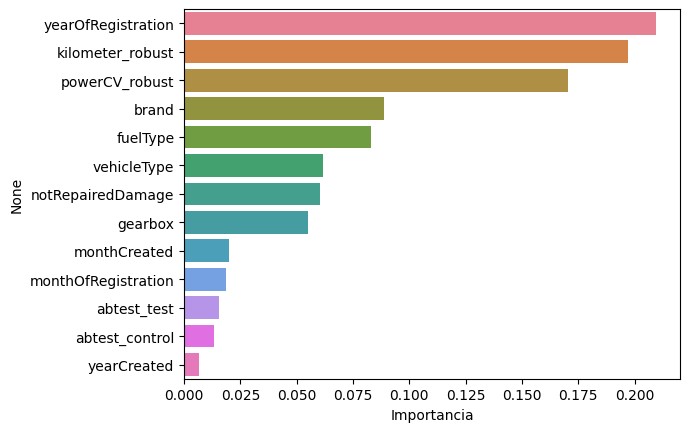

In [83]:
sns.barplot(x="Importancia", y= df_importancia_xg.index, hue=df_importancia_xg.index, data= df_importancia_xg)

Por lo que hemos podido observar, el mejor modelo es el ofrecido por el Random Forest ya que tiene el mejor equilibrio entre un bajo over fitting y la minimización de los errores.